In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

# Loading & Curating Data

In [2]:
file_path = 'diamonds (cleaned).csv'
df = pd.read_csv(file_path)
df.head()

Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear    NaN     E     VS1          1.20                1.65   
2              Oval    NaN     E     VS1          1.19                1.41   
3             Heart    NaN     D      IF          1.00                1.18   
4           Radiant    NaN     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   NaN   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   NaN   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   NaN   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   NaN   
4     69.4     66.0  Excellent  Very Good                         Thick   NaN   

   Length  Width  Height  Price           Type Fluorescence  
0    7.09   6.95    4.57   2640  GIA Lab-Grown          NaN  
1    9.64   5.86    3.66   1070  GIA Lab-Grown          NaN  
2    8.44   6.00    3.79   1070  GIA Lab-Grown          NaN  
3    5.85   6.89    4.25   7110            GIA        Faint  
4    6.80   5.05    3.50   3050            GIA          NaN

- Shape: Geometric shape of the diamond.

- Cut: Quality grade of the diamond's cut.

- Color: Diamond color grade from D to H.

- Clarity: Clarity grade based on imperfections.

- Carat Weight: Weight of the diamond in carats.

- Length/Width Ratio: Proportion of length to width.

- Depth %: Diamond depth as a percentage of its width.

- Table %: Width of the top facet as a percentage.

- Polish: Surface finish quality of the diamond.

- Symmetry: Precision of the diamond’s shape.

- Girdle: Thickness of the diamond's edge.

- Culet: Size of the bottom facet.

- Length: Length of the diamond in millimeters.

- Width: Width of the diamond in millimeters.

- Height: Height of the diamond in millimeters.

- Price: Price of the diamond in US dollars ($).

- Type: Certification or origin type of the diamond.

- Fluorescence: UV fluorescence level of the diamond.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [4]:
df.describe().T


count         mean          std      min      25%  \
Carat Weight        6480.0     1.235772     0.506647     1.00     1.01   
Length/Width Ratio  6480.0     1.329548     0.325707     1.00     1.02   
Depth %             6478.0    64.206499     4.773192    46.10    61.20   
Table %             6468.0    61.828541     4.760197    51.00    58.00   
Length              6465.0     7.663595     1.674665     5.18     6.33   
Width               6465.0     6.098323     1.151152     4.42     5.39   
Height              6465.0     3.885708     0.599420     2.67     3.46   
Price               6485.0  3529.391365  3280.439167  1010.00  1210.00   

                        50%      75%       max  
Carat Weight           1.03     1.20      9.38  
Length/Width Ratio     1.27     1.51      2.58  
Depth %               63.10    67.60     77.00  
Table %               61.00    65.00     78.00  
Length                 7.42     8.66     15.21  
Width                  5.64     6.61     14.88  
Height                 3.67     4.10      8.17  
Price               3320.00  4390.00  39460.00

In [5]:
numarical_value = df.select_dtypes(include=['float64', 'int64']).columns
categorical_value = df.select_dtypes(include=['object']).columns

missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

Shape                                      5
Cut                                     4303
Color                                      5
Clarity                                    5
Carat Weight                               5
Length/Width Ratio                         5
Depth %                                    7
Table %                                   17
Polish                                    20
Symmetry                                  20
Girdle                                    22
Culet                                   4594
Length                                    20
Width                                     20
Height                                    20
Price                                      0
Type                                       0
Fluorescence                            5264
Rows with at least one missing value    6482
dtype: int64

It shows that allmost all observations (6482/6485) have at least one missing variable.

## First Curation

In [6]:
# NULLs in Culet are caused by pandas transforming "None" to NULLS

df['Fluorescence'].replace(np.nan, "No Fluorescence", inplace=True)

C:\Users\eloil\AppData\Local\Temp\ipykernel_11956\1106809853.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fluorescence'].replace(np.nan, "No Fluorescence", inplace=True)


In [7]:
df['Culet'].value_counts()

Culet
Pointed       1861
Very Small      18
Small           10
Medium           1
Very Large       1
Name: count, dtype: int64

In [8]:
# NULLs in Culet are caused by pandas transforming "None" to NULLS
df['Culet'].replace(np.nan, "No Culet", inplace=True)

missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

C:\Users\eloil\AppData\Local\Temp\ipykernel_11956\3726514159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Culet'].replace(np.nan, "No Culet", inplace=True)


Shape                                      5
Cut                                     4303
Color                                      5
Clarity                                    5
Carat Weight                               5
Length/Width Ratio                         5
Depth %                                    7
Table %                                   17
Polish                                    20
Symmetry                                  20
Girdle                                    22
Culet                                      0
Length                                    20
Width                                     20
Height                                    20
Price                                      0
Type                                       0
Fluorescence                               0
Rows with at least one missing value    4309
dtype: int64

In [9]:
# Count rows where "Length / Width Ratio" is NOT null 
# AND exactly one of "Length" or "Width" is available (not both, not none)
missing_length_or_width = df[
    df["Length/Width Ratio"].notnull() & 
    df["Length"].notnull() ^ df["Width"].notnull()  # XOR: Ensures only one of them is present
]

missing_length_or_width_count = missing_length_or_width.shape[0]
missing_length_or_width_count


0

In none of the rows the "Length / Width Ratio" is given and only Length OR Width is missing. So the missing values can not be calculated.

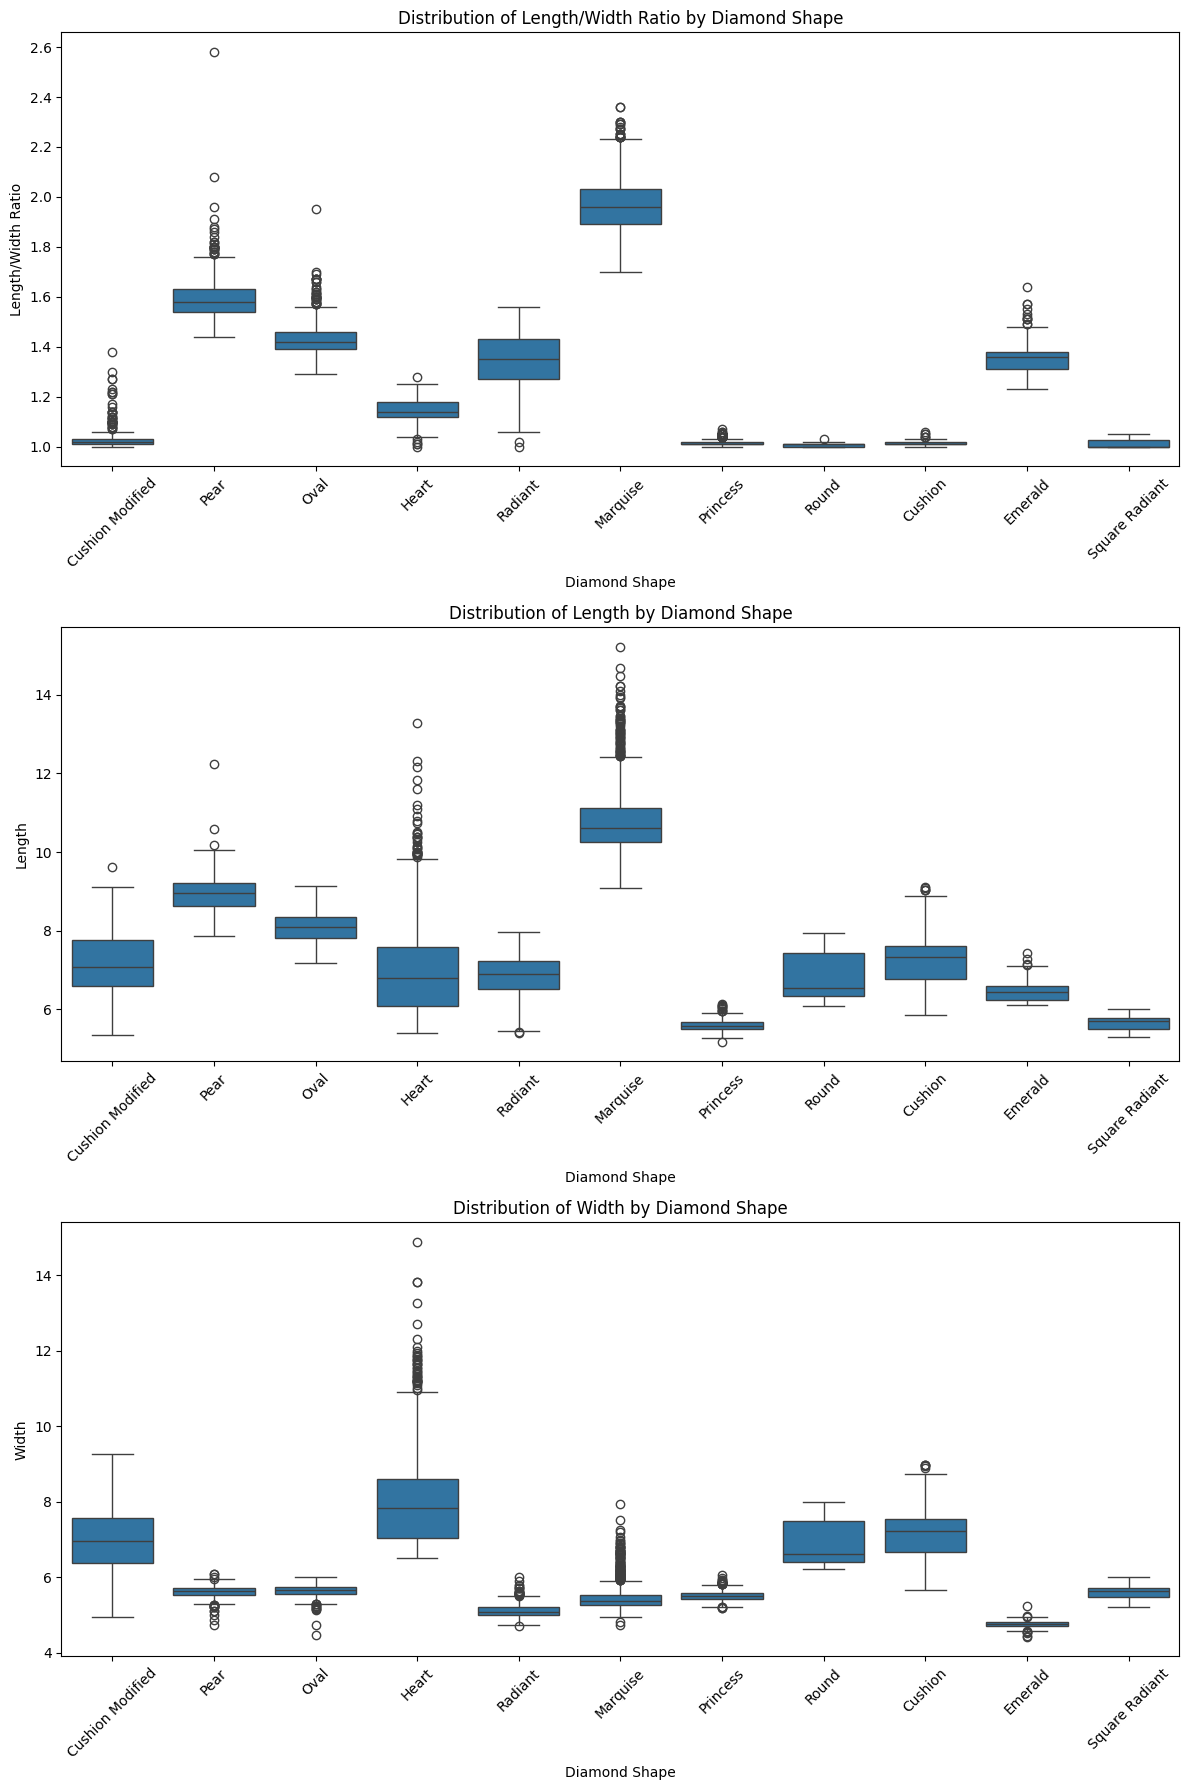

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where "Shape", "Length/Width Ratio", "Length", or "Width" is missing
df_filtered_ratio = df.dropna(subset=["Shape", "Length/Width Ratio"])
df_filtered_len_wid = df.dropna(subset=["Shape", "Length", "Width"])

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Boxplot for Length/Width Ratio
sns.boxplot(data=df_filtered_ratio, x="Shape", y="Length/Width Ratio", ax=axes[0])
axes[0].set_title("Distribution of Length/Width Ratio by Diamond Shape")
axes[0].set_xlabel("Diamond Shape")
axes[0].set_ylabel("Length/Width Ratio")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for Length
sns.boxplot(data=df_filtered_len_wid, x="Shape", y="Length", ax=axes[1])
axes[1].set_title("Distribution of Length by Diamond Shape")
axes[1].set_xlabel("Diamond Shape")
axes[1].set_ylabel("Length")
axes[1].tick_params(axis='x', rotation=45)

# Boxplot for Width
sns.boxplot(data=df_filtered_len_wid, x="Shape", y="Width", ax=axes[2])
axes[2].set_title("Distribution of Width by Diamond Shape")
axes[2].set_xlabel("Diamond Shape")
axes[2].set_ylabel("Width")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


It looks like there are clear patterns between shape, length, width and len/wid ratio. So it might be a valid assumption to replace length and width with the means of their shapes, while mainting plausibility with the
len/wid ratio.

In [11]:
# Step 1: Compute mean Length, Width, and Depth % per Shape
shape_means = df.groupby("Shape")[["Length", "Width", "Depth %"]].mean().reset_index()

# Step 2: Merge mean values back into the dataframe
df = df.merge(shape_means, on="Shape", suffixes=("", "_mean"), how="left")

# Step 3: Identify rows where Length, Width, and Height are missing, but Ratio and Depth % are given
missing_len_wid_ht = (
    df["Length"].isnull() & 
    df["Width"].isnull() & 
    df["Height"].isnull() & 
    df["Length/Width Ratio"].notnull() & 
    df["Depth %"].notnull()
)

# Step 4: Estimate missing Width using Shape-Based Mean Width
df.loc[missing_len_wid_ht, "Width"] = df["Width_mean"]

# Step 5: Compute missing Length using Width and Ratio
df.loc[missing_len_wid_ht, "Length"] = df["Width"] * df["Length/Width Ratio"]

# Step 6: Compute missing Height using Depth % formula
df.loc[missing_len_wid_ht, "Height"] = (df["Depth %"] / 100) * df["Width"]

# Step 7: Drop auxiliary mean columns
df.drop(columns=["Length_mean", "Width_mean", "Depth %_mean"], inplace=True)

# Step 8: Drop rows where Length is still missing (since Length, Width, and Height are always missing together)
df = df.dropna(subset=["Length"])


In [12]:
missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

Shape                                      0
Cut                                     4298
Color                                      0
Clarity                                    0
Carat Weight                               0
Length/Width Ratio                         0
Depth %                                    0
Table %                                   10
Polish                                    13
Symmetry                                  13
Girdle                                    15
Culet                                      0
Length                                     0
Width                                      0
Height                                     0
Price                                      0
Type                                       0
Fluorescence                               0
Rows with at least one missing value    4302
dtype: int64

In [13]:
# Missing values in "Cut" don't seem to explain anything, thus dropping the column
df = df.drop(columns=["Cut"])


In [14]:
df["Girdle"].value_counts()

Girdle
Medium to Slightly Thick             1713
Slightly Thick to Thick               986
Medium to Thick                       672
Thick to Very Thick                   585
Medium                                582
Slightly Thick to Very Thick          526
Medium to Very Thick                  229
Slightly Thick                        224
Thick                                 199
Thin to Medium                        165
Thin to Slightly Thick                120
Thin to Thick                          95
Very Thick                             85
Thick to Extremely Thick               58
Very Thick to Extremely Thick          46
Thin to Very Thick                     41
Slightly Thick to Extremely Thick      38
Medium to Extremely Thick              30
Thin                                   16
Very Thin to Very Thick                14
Thin to Extremely Thick                13
Extremely Thick                         8
Very Thin to Thick                      8
Very Thin to Slightly Thick

The Girdle variable originally had many overlapping categories with inconsistent ranges. 
To simplify, we grouped ranges into the closest matching thickness level, reducing complexity while preserving meaningful distinctions.








In [15]:
print(df["Girdle"].unique())

print(len(df["Girdle"].unique()))

['Medium to Thick' 'Slightly Thick to Very Thick' 'Thick'
 'Slightly Thick to Thick' 'Medium to Slightly Thick'
 'Medium to Very Thick' 'Slightly Thick' 'Medium' 'Thick to Very Thick'
 'Very Thick' 'Thin to Medium' 'Thin to Thick' 'Medium to Extremely Thick'
 'Slightly Thick to Extremely Thick' 'Very Thin to Very Thick'
 'Thin to Slightly Thick' 'Thick to Extremely Thick' nan
 'Thin to Very Thick' 'Slightly Thick to Slightly Thick'
 'Very Thin to Thick' 'Thin' 'Very Thick to Extremely Thick'
 'Thin to Extremely Thick' 'Extremely Thick' 'Extremely Thin to Medium'
 'Very Thin to Extremely Thick' 'Very Thin to Slightly Thick'
 'Extremely Thin to Extremely Thick' 'Extremely Thin to Slightly Thick']
30


In [16]:
# Define the precise mapping for Girdle values
girdle_mapping = {
    "Medium to Thick": "Slightly Thick",
    "Slightly Thick to Very Thick": "Thick",
    "Slightly Thick to Thick": "Slightly Thick",
    "Medium to Slightly Thick": "Medium",
    "Medium to Very Thick": "Slightly Thick",
    "Thick to Very Thick": "Thick",
    "Thin to Medium": "Slightly Thin",
    "Thin to Thick": "Slightly Thin",
    "Medium to Extremely Thick": "Thick",
    "Slightly Thick to Extremely Thick": "Thick",
    "Very Thin to Very Thick": "Medium",
    "Thin to Slightly Thick": "Slightly Thin",
    "Thick to Extremely Thick": "Very Thick",
    "Thin to Very Thick": "Slightly Thick",
    "Slightly Thick to Slightly Thick": "Slightly Thick",
    "Very Thin to Thick": "Slightly Thin",
    "Very Thick to Extremely Thick": "Very Thick",
    "Thin to Extremely Thick": "Slightly Thick",
    "Extremely Thin to Medium": "Thin",
    "Very Thin to Extremely Thick": "Medium",
    "Very Thin to Slightly Thick": "Slightly Thin",
    "Extremely Thin to Extremely Thick": "Medium",
    "Extremely Thin to Slightly Thick": "Thin",
    "Thick": "Thick",
    "Slightly Thick": "Slightly Thick",
    "Medium": "Medium",
    "Very Thick": "Very Thick",
    "Thin": "Thin",
    "Extremely Thick": "Extremely Thick"
}

# Apply the mapping while keeping NULL values unchanged
df["Girdle"] = df["Girdle"].map(lambda x: girdle_mapping[x] if x in girdle_mapping else x)



In [17]:
df["Girdle"].unique()

array(['Slightly Thick', 'Thick', 'Medium', 'Very Thick', 'Slightly Thin',
       nan, 'Thin', 'Extremely Thick'], dtype=object)

In [18]:
missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

Shape                                    0
Color                                    0
Clarity                                  0
Carat Weight                             0
Length/Width Ratio                       0
Depth %                                  0
Table %                                 10
Polish                                  13
Symmetry                                13
Girdle                                  15
Culet                                    0
Length                                   0
Width                                    0
Height                                   0
Price                                    0
Type                                     0
Fluorescence                             0
Rows with at least one missing value    15
dtype: int64

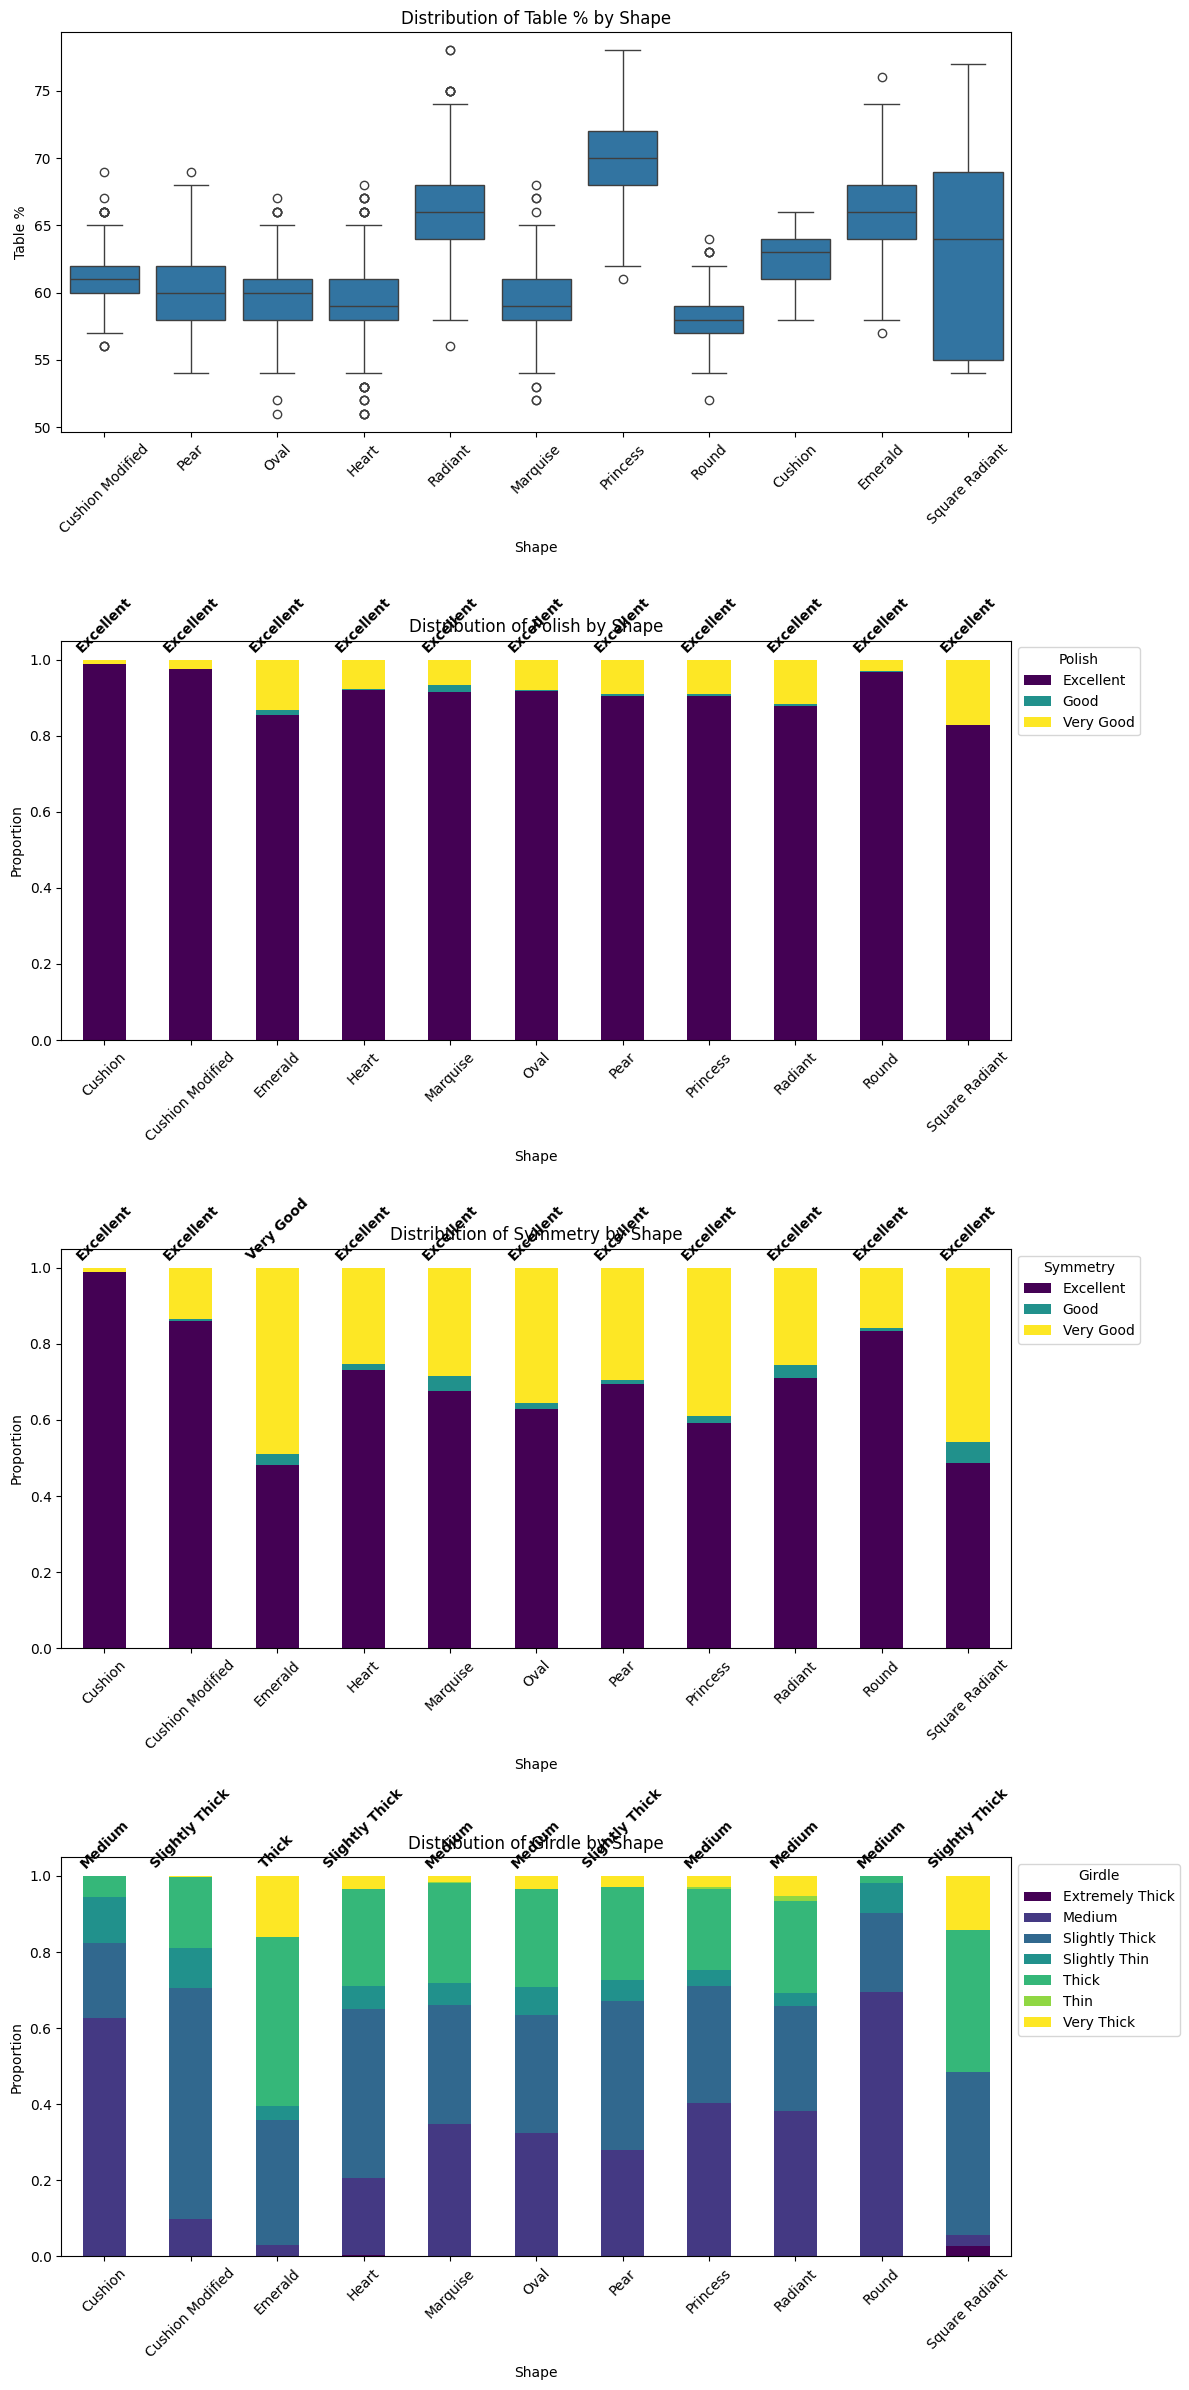

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define categorical attributes
categorical_attributes = ["Polish", "Symmetry", "Girdle"]

# Set figure size
fig, axes = plt.subplots(4, 1, figsize=(12, 24))  # 4 rows to include Table % boxplot

# Boxplot for Table % by Shape
sns.boxplot(data=df, x="Shape", y="Table %", ax=axes[0])
axes[0].set_title("Distribution of Table % by Shape")
axes[0].set_xlabel("Shape")
axes[0].set_ylabel("Table %")
axes[0].tick_params(axis='x', rotation=45)

# Create stacked bar charts for each categorical attribute
for i, attr in enumerate(categorical_attributes):
    # Count values for each shape
    category_counts = df.groupby("Shape")[attr].value_counts(normalize=True).unstack().fillna(0)
    
    # Plot stacked bar chart
    category_counts.plot(kind="bar", stacked=True, ax=axes[i+1], colormap="viridis")

    # Display mode for each shape
    mode_values = df.groupby("Shape")[attr].agg(lambda x: x.mode()[0])  # Get first mode if multiple
    for j, shape in enumerate(mode_values.index):
        axes[i+1].text(j, 1.02, mode_values[shape], ha='center', fontsize=10, 
                       color="black", fontweight="bold", rotation=45)

    axes[i+1].set_title(f"Distribution of {attr} by Shape")
    axes[i+1].set_xlabel("Shape")
    axes[i+1].set_ylabel("Proportion")
    axes[i+1].legend(title=attr, bbox_to_anchor=(1, 1))
    axes[i+1].tick_params(axis='x', rotation=45)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [20]:
# Replace NaNs in "Table %" with the median per Shape
df["Table %"].fillna(df.groupby("Shape")["Table %"].transform("median"), inplace=True)

# Replace NaNs in "Polish", "Symmetry", and "Girdle" with the mode per Shape
for col in ["Polish", "Symmetry", "Girdle"]:
    df[col].fillna(df.groupby("Shape")[col].transform(lambda x: x.mode()[0]), inplace=True)




missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value


C:\Users\eloil\AppData\Local\Temp\ipykernel_11956\2377876079.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Table %"].fillna(df.groupby("Shape")["Table %"].transform("median"), inplace=True)
C:\Users\eloil\AppData\Local\Temp\ipykernel_11956\2377876079.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

Shape                                   0
Color                                   0
Clarity                                 0
Carat Weight                            0
Length/Width Ratio                      0
Depth %                                 0
Table %                                 0
Polish                                  0
Symmetry                                0
Girdle                                  0
Culet                                   0
Length                                  0
Width                                   0
Height                                  0
Price                                   0
Type                                    0
Fluorescence                            0
Rows with at least one missing value    0
dtype: int64

In [21]:
df.reset_index(drop=True, inplace=True)


In [22]:
# Create a new column for Price per Carat, as this is the variable of interest of the buyer.
# He will allways now the weight of the diamond he is thinking to buy. Carat (Weight) will 
# be kept as an explanatory variable nevertheless.
#  
df["Price per Carat"] = df["Price"] / df["Carat Weight"]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6478 non-null   object 
 1   Color               6478 non-null   object 
 2   Clarity             6478 non-null   object 
 3   Carat Weight        6478 non-null   float64
 4   Length/Width Ratio  6478 non-null   float64
 5   Depth %             6478 non-null   float64
 6   Table %             6478 non-null   float64
 7   Polish              6478 non-null   object 
 8   Symmetry            6478 non-null   object 
 9   Girdle              6478 non-null   object 
 10  Culet               6478 non-null   object 
 11  Length              6478 non-null   float64
 12  Width               6478 non-null   float64
 13  Height              6478 non-null   float64
 14  Price               6478 non-null   int64  
 15  Type                6478 non-null   object 
 16  Fluore

# EDA

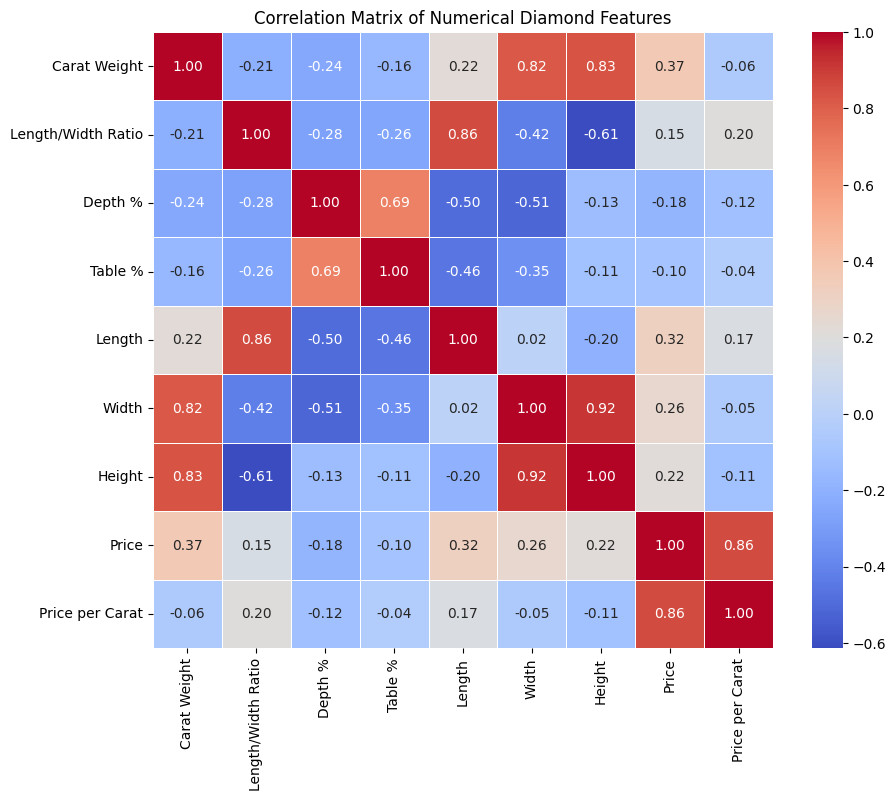

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Matrix of Numerical Diamond Features")

# Show plot
plt.show()


## Univariate Analysis of Factors Influencing Price

In [25]:
# Count the number of unique values for each categorical variable
unique_counts = df.select_dtypes(include=["object"]).nunique()
print(unique_counts)


Shape           11
Color            5
Clarity          6
Polish           3
Symmetry         3
Girdle           7
Culet            6
Type             3
Fluorescence     4
dtype: int64


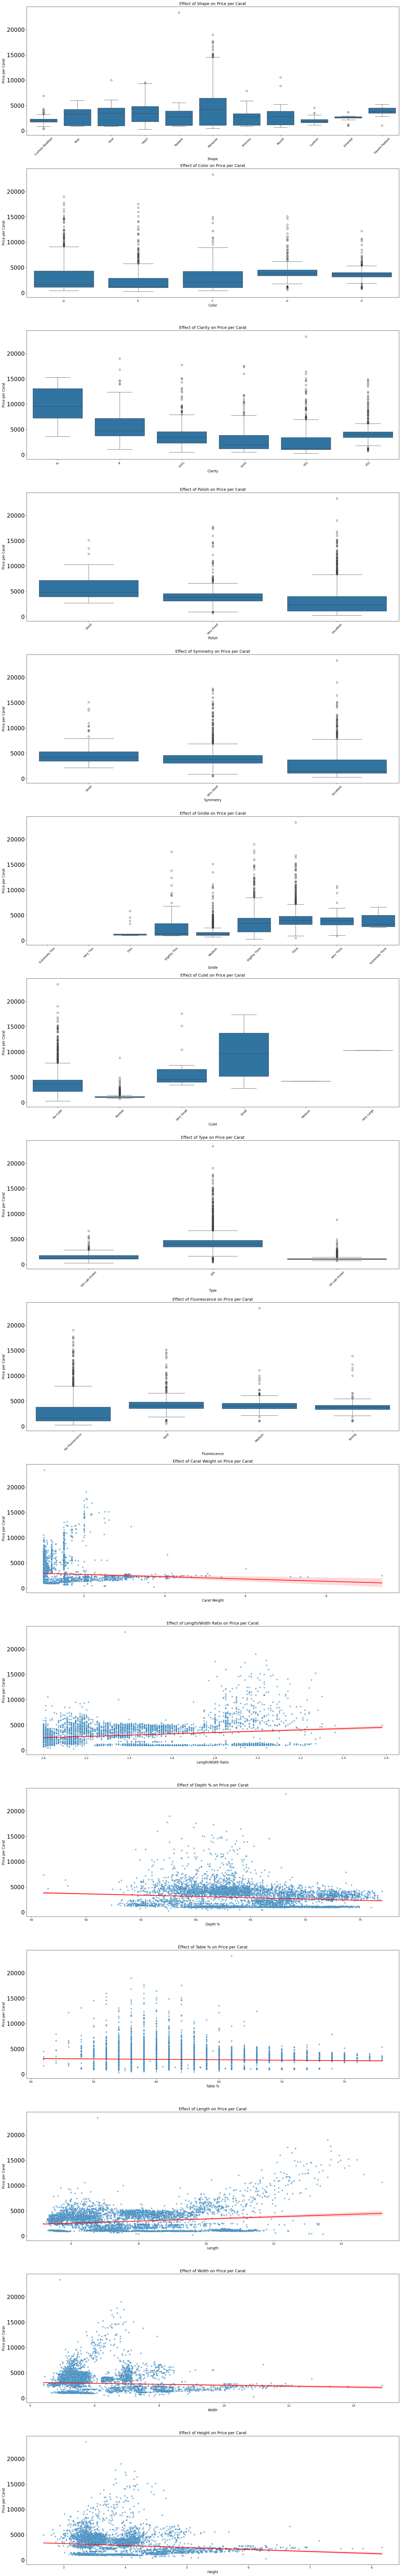

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define ordered categories where applicable
ordered_categories = {
    "Girdle": ["Extremely Thin", "Very Thin", "Thin", "Slightly Thin", "Medium", "Slightly Thick", "Thick", "Very Thick", "Extremely Thick"],
    "Polish": ["Good", "Very Good", "Excellent"],
    "Symmetry": ["Good", "Very Good", "Excellent"],
    "Clarity": ["FL", "IF", "VVS1", "VVS2", "VS1", "VS2"],  # Increasing inclusions
    "Color": ["D", "E", "F", "G", "H"],  # D is the most colorless
    "Culet": ["No Culet", "Pointed", "Very Small", "Small", "Medium", "Very Large"],  # Increasing size
    "Fluorescence": ["No Fluorescence", "Faint", "Medium", "Strong"]  # Increasing fluorescence effect
}

# Define variables
categorical_vars = ["Shape", "Color", "Clarity", "Polish", "Symmetry", "Girdle", "Culet", "Type", "Fluorescence"]
numerical_vars = ["Carat Weight", "Length/Width Ratio", "Depth %", "Table %", "Length", "Width", "Height"]

# Calculate total number of subplots needed (one column layout)
total_vars = len(categorical_vars) + len(numerical_vars)
fig, axes = plt.subplots(total_vars, 1, figsize=(20, total_vars * 8))  # Increase y-axis space

# Plot categorical variables as boxplots with proper ordering
for i, var in enumerate(categorical_vars):
    if var in ordered_categories:
        sns.boxplot(data=df, x=pd.Categorical(df[var], categories=ordered_categories[var], ordered=True), y="Price per Carat", ax=axes[i])
    else:
        sns.boxplot(data=df, x=var, y="Price per Carat", ax=axes[i])
    
    axes[i].set_title(f"Effect of {var} on Price per Carat", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Price per Carat", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelsize=20)  # Increase y-axis label size

# Plot numerical variables as scatter plots
for i, var in enumerate(numerical_vars):
    index = len(categorical_vars) + i  # Continue plotting in the same column
    sns.scatterplot(data=df, x=var, y="Price per Carat", alpha=0.5, ax=axes[index])
    sns.regplot(data=df, x=var, y="Price per Carat", scatter=False, ax=axes[index], color="red")
    axes[index].set_title(f"Effect of {var} on Price per Carat", fontsize=14)
    axes[index].set_xlabel(var, fontsize=12)
    axes[index].set_ylabel("Price per Carat", fontsize=12)
    axes[index].tick_params(axis='y', labelsize=20)  # Increase y-axis label size

# Adjust layout
plt.tight_layout()
plt.show()


The univariate analysis highlights which variables might influence price per carat. However, for numerical variables, multiple interacting effects seem to impact price differently. Therefore, the following section will conduct a short EDA on multivariate effects on price.

## Mulitvariate Analysis of Factors Influencing Price

### Numerical Variables & Type - Effect on Price per Charat

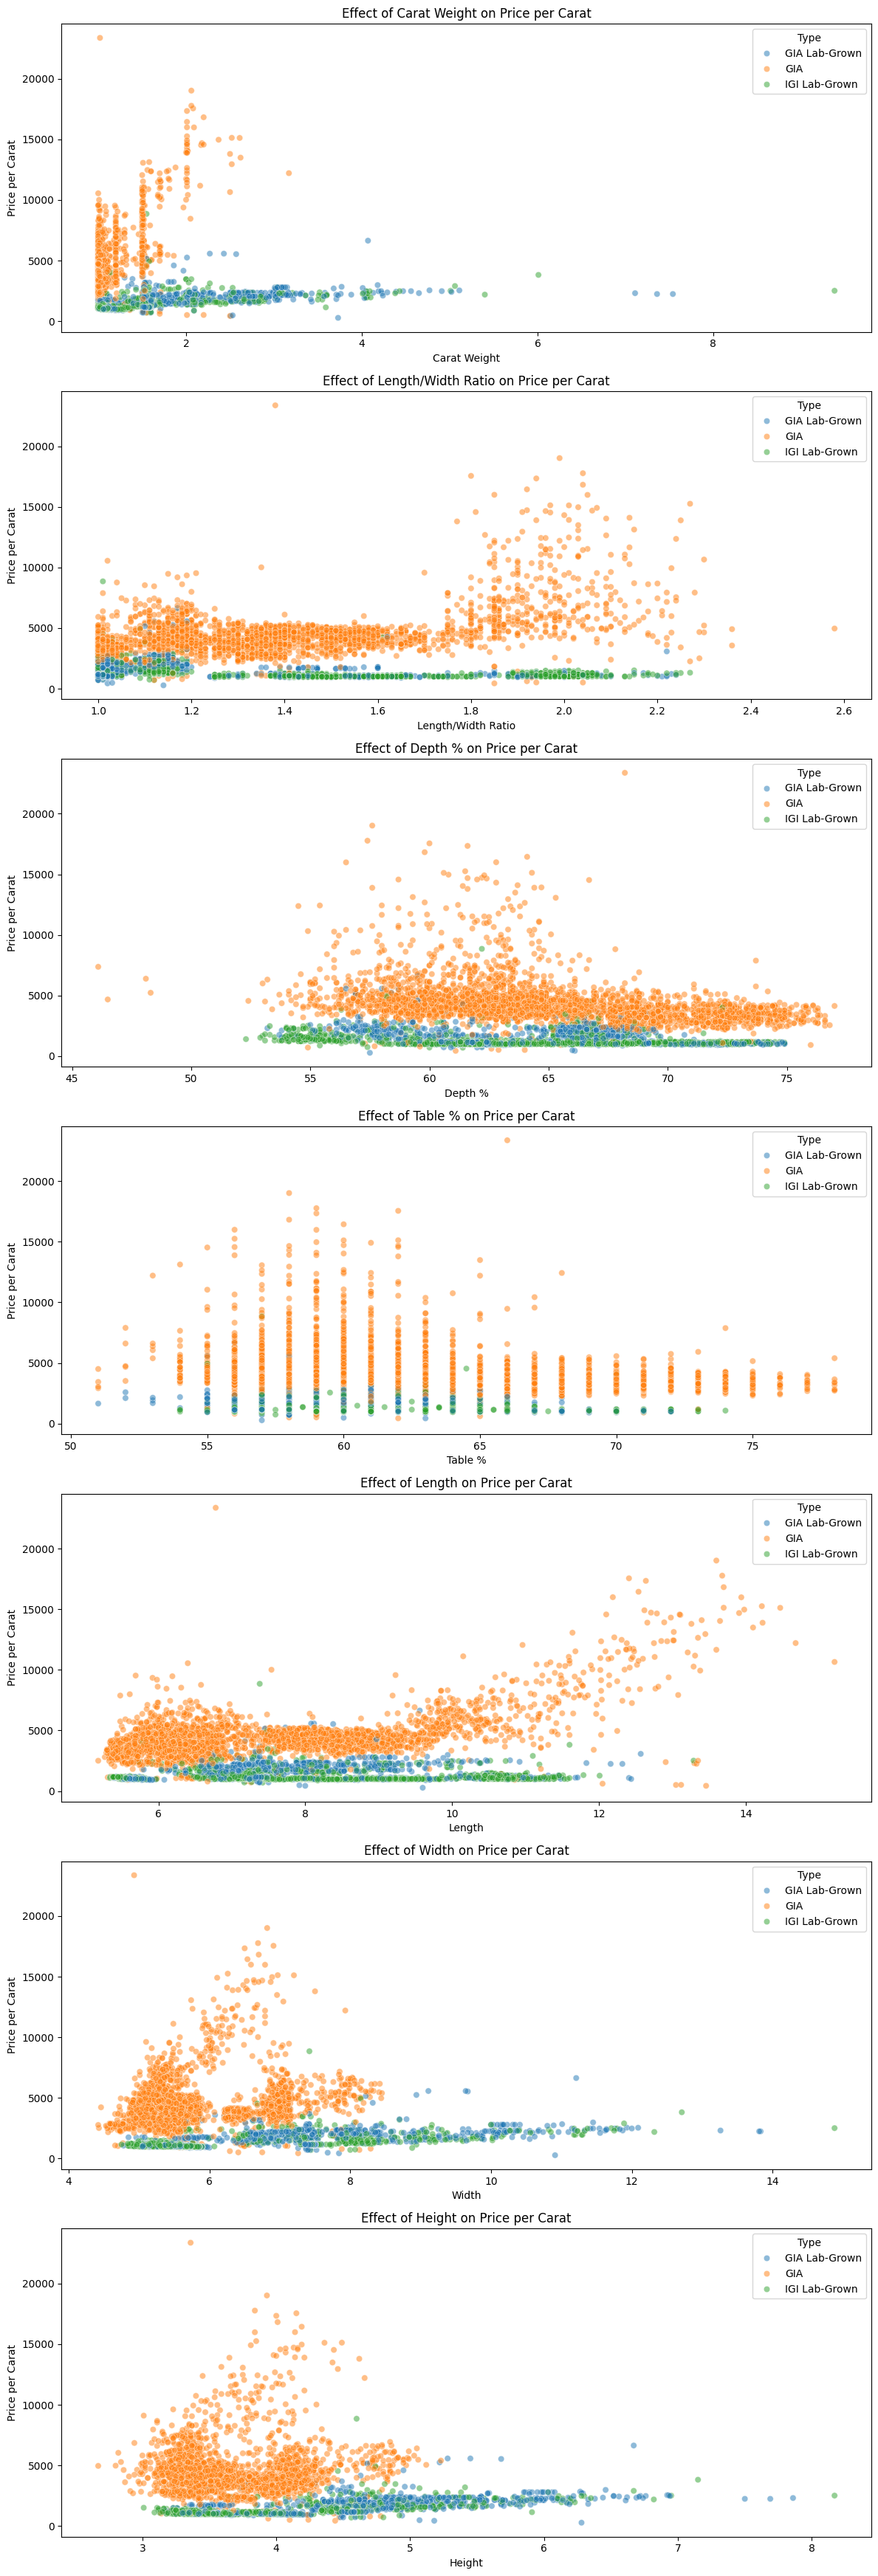

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables
numerical_vars = ["Carat Weight", "Length/Width Ratio", "Depth %", "Table %", "Length", "Width", "Height"]

# Set figure size
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, len(numerical_vars) * 5))

# Create scatter plots for each numerical variable vs. Price per Carat, grouped by Type
for i, var in enumerate(numerical_vars):
    sns.scatterplot(data=df, x=var, y="Price per Carat", hue="Type", alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Effect of {var} on Price per Carat")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Price per Carat")

# Adjust layout
plt.tight_layout()
plt.show()


### Numerical Variables & Shape - Effect on Price per Charat

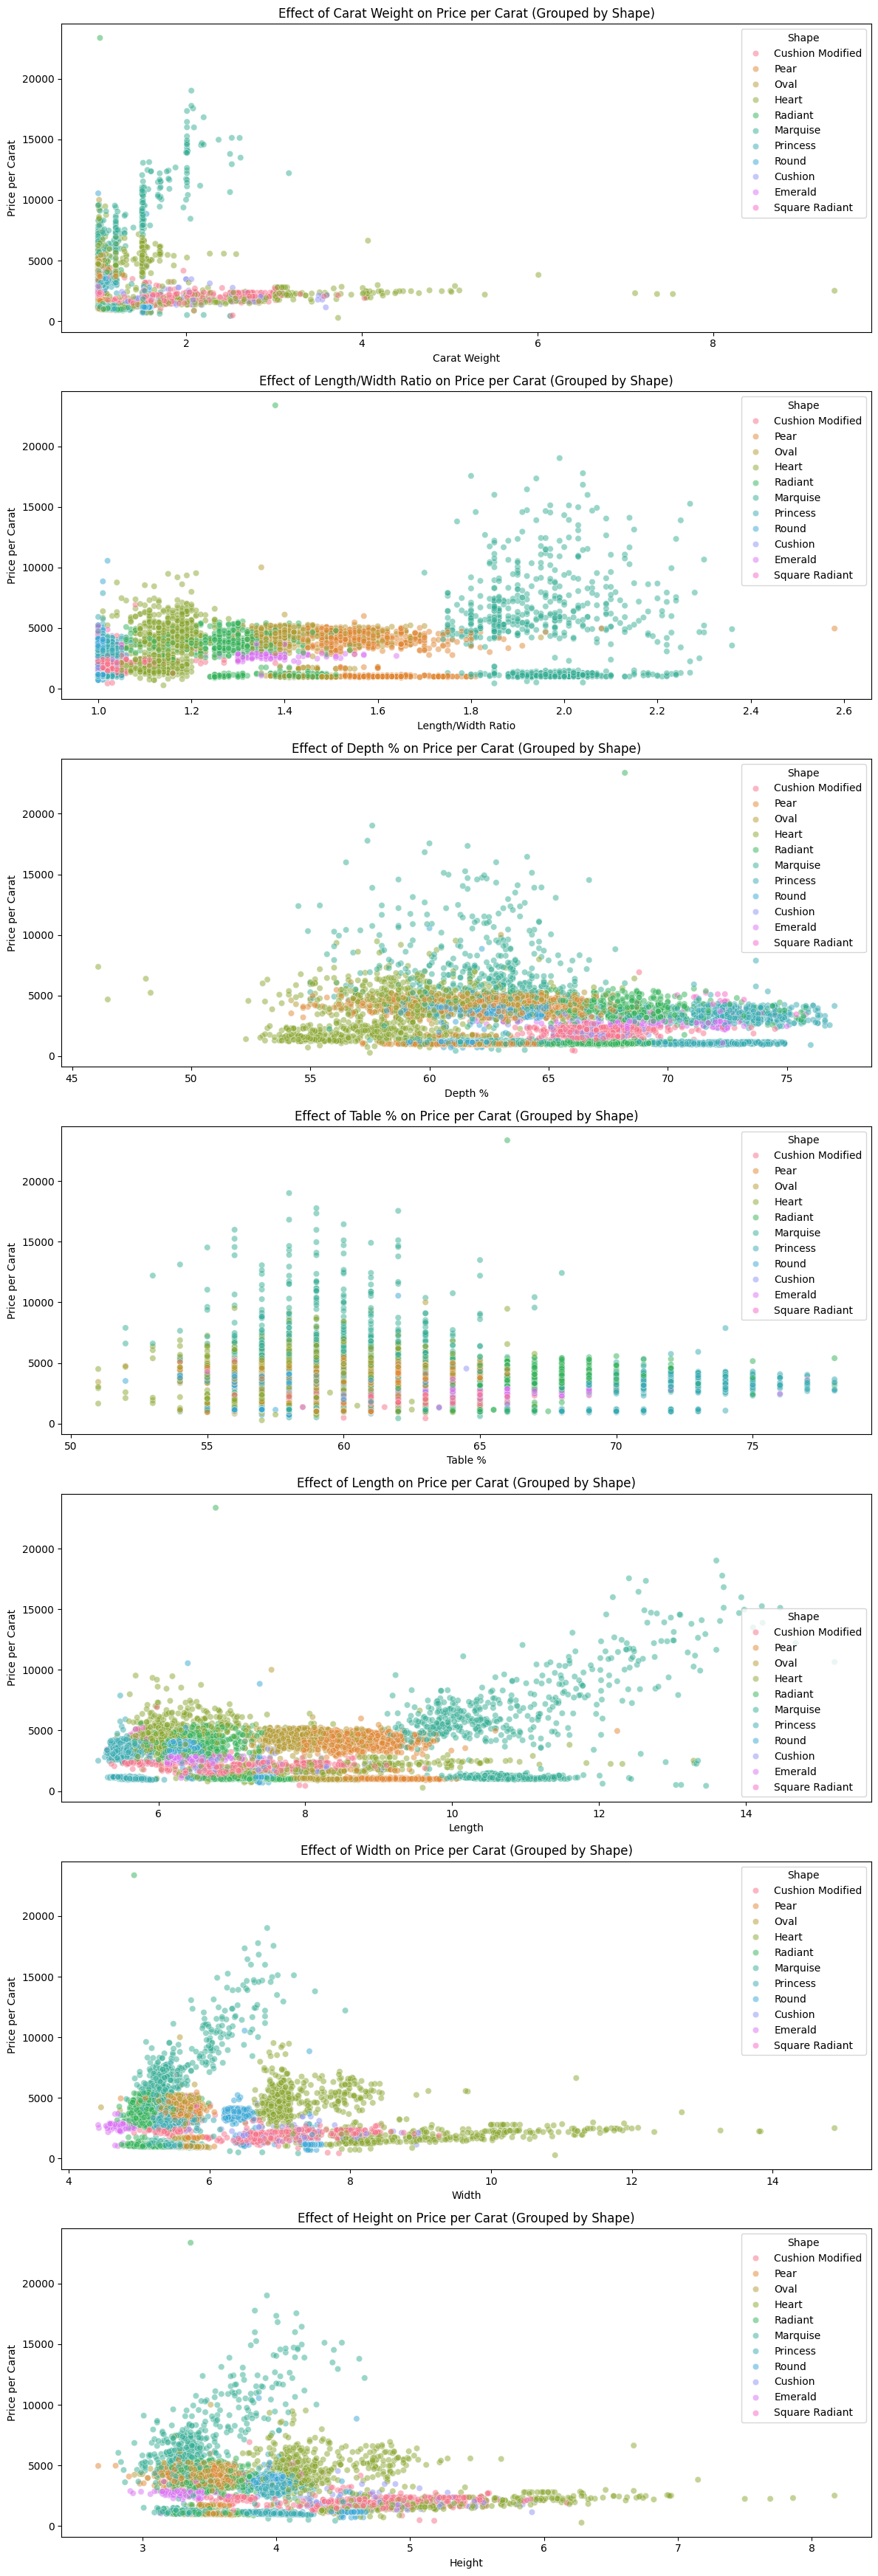

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables
numerical_vars = ["Carat Weight", "Length/Width Ratio", "Depth %", "Table %", "Length", "Width", "Height"]

# Set figure size
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, len(numerical_vars) * 5))

# Create scatter plots for each numerical variable vs. Price per Carat, grouped by Shape
for i, var in enumerate(numerical_vars):
    sns.scatterplot(data=df, x=var, y="Price per Carat", hue="Shape", alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Effect of {var} on Price per Carat (Grouped by Shape)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Price per Carat")

# Adjust layout
plt.tight_layout()
plt.show()


When using Shape and Type of the diamonds in combination, the effects of different variables on price per carat become much clearer for each type of diamond. In the following steps, these interactions may be considered for feature selection and interaction terms to improve the model.

# Dafting the First Model: Linear Regression

In [29]:
# Create a new DataFrame for linear regression (drop 'Price' and keep 'Price per Carat' as target)
df_lin = df.drop(columns=["Price"]).copy()

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df_lin.drop(columns=["Price per Carat"])
y = df_lin["Price per Carat"]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["number"]).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert encoded categorical features to DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X.index)

# Drop original categorical columns and concatenate encoded ones
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 572.68
Mean Squared Error (MSE): 1062054.48
Root Mean Squared Error (RMSE): 1030.56
R² Score: 0.7596


In [31]:
import statsmodels.api as sm

# Add a constant for intercept
X_train_const = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Print the full summary including coefficients, p-values, R-squared, etc.
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:        Price per Carat   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     487.3
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:39:03   Log-Likelihood:                -42524.
No. Observations:                5182   AIC:                         8.514e+04
Df Residuals:                    5135   BIC:                         8.545e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [32]:
# Identify features with p > 0.05
high_pval_features = model_sm.pvalues[model_sm.pvalues > 0.05].index.tolist()

# Drop those features (except the intercept)
X_train_selected = X_train.drop(columns=[f for f in high_pval_features if f != "const"])
X_test_selected = X_test.drop(columns=[f for f in high_pval_features if f != "const"])

# Re-run regression
model_sm_selected = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
print(model_sm_selected.summary())


                            OLS Regression Results                            
Dep. Variable:        Price per Carat   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     44.06
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           7.05e-61
Time:                        16:39:03   Log-Likelihood:                -46727.
No. Observations:                5182   AIC:                         9.347e+04
Df Residuals:                    5174   BIC:                         9.352e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2905.8605     27

### Performe Hyperparameter Tuning, Add Regularization and Validation:

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df_lin.drop(columns=["Price per Carat"])
y = df_lin["Price per Carat"]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["number"]).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert encoded categorical features to DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X.index)

# Drop original categorical columns and concatenate encoded ones
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune for Linear Regression
param_grid = {
    "fit_intercept": [True, False]  # Whether to calculate the intercept
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring="r2", n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_




#### Performance of Tuned Model on Test Data set:

In [34]:
# Make predictions on test data
y_pred_tuned = best_model.predict(X_test)

# Evaluate tuned model performance
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Report results
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
print(f"Tuned Mean Absolute Error (MAE): {mae_tuned:.2f}")
print(f"Tuned Mean Squared Error (MSE): {mse_tuned:.2f}")
print(f"Tuned Root Mean Squared Error (RMSE): {rmse_tuned:.2f}")
print(f"Tuned R² Score: {r2_tuned:.4f}")

Best Hyperparameters: {'fit_intercept': True}
Tuned Mean Absolute Error (MAE): 572.68
Tuned Mean Squared Error (MSE): 1062054.48
Tuned Root Mean Squared Error (RMSE): 1030.56
Tuned R² Score: 0.7596


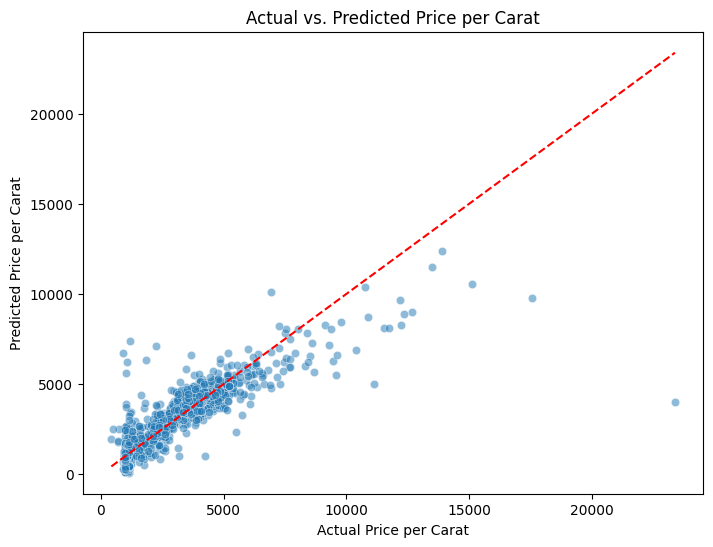

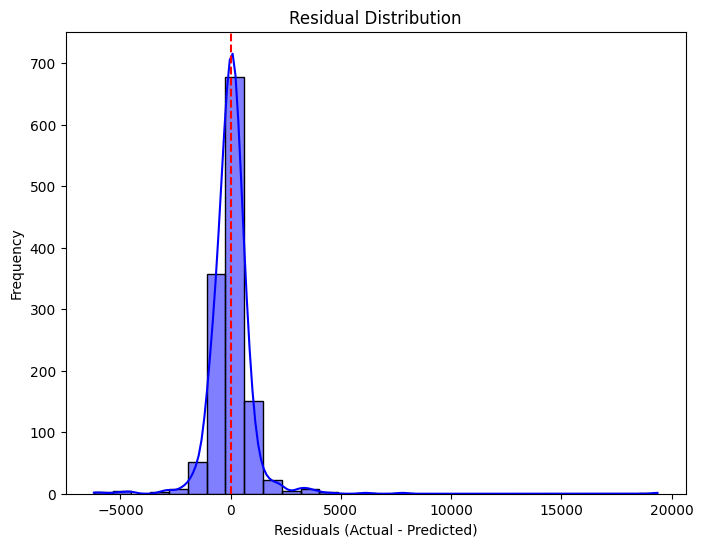

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_test - y_pred_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


## Linear Regression With Polynomial Interaction Terms

### Between Numerical Only

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Generate polynomial interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define models and corresponding parameter grids
models = {
    "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False], "positive": [True, False]}),
    "Ridge": (Ridge(), {"fit_intercept": [True, False], "positive": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}),
    "Lasso": (Lasso(), {"fit_intercept": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]})
}

best_model = None
best_params = None
best_score = float("inf")

# Iterate through models and perform GridSearchCV
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train_poly, y_train)
    
    # Check if the current model is better
    if -grid_search.best_score_ < best_score:
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = -grid_search.best_score_

# Evaluate on test set
y_pred = best_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Test MSE:", mse)


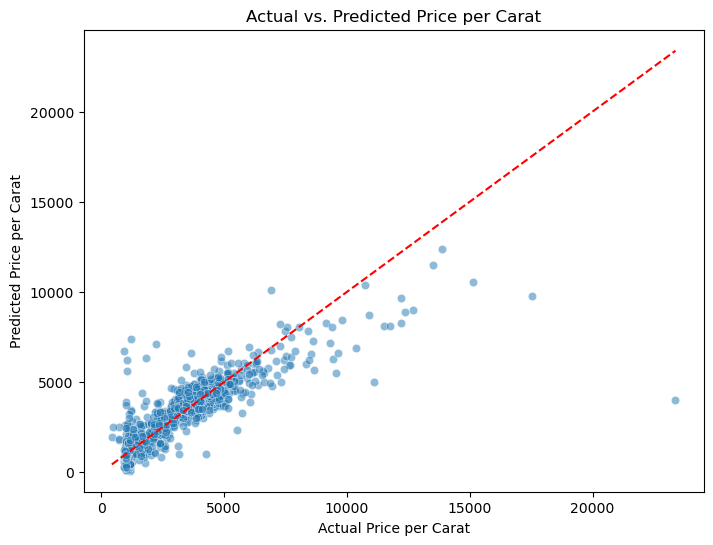

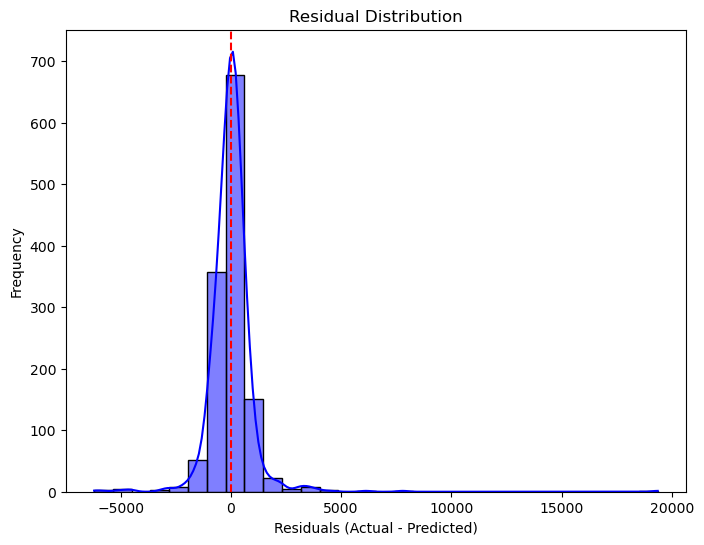

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_test - y_pred_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

### Between Numerical and Categorical

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Generate polynomial interaction terms for numerical features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_num_poly = poly.fit_transform(X_train[numerical_features])
X_test_num_poly = poly.transform(X_test[numerical_features])

# Convert to DataFrame
num_poly_df_train = pd.DataFrame(X_train_num_poly, columns=poly.get_feature_names_out(numerical_features), index=X_train.index)
num_poly_df_test = pd.DataFrame(X_test_num_poly, columns=poly.get_feature_names_out(numerical_features), index=X_test.index)

# Create interactions between categorical and numerical features
interaction_terms_train = []
interaction_terms_test = []

for cat_col in encoded_df.columns:
    for num_col in num_poly_df_train.columns:
        interaction_terms_train.append(X_train[cat_col] * num_poly_df_train[num_col])
        interaction_terms_test.append(X_test[cat_col] * num_poly_df_test[num_col])

# Convert interaction terms to DataFrame
interaction_df_train = pd.DataFrame(np.array(interaction_terms_train).T, columns=[f"{cat_col}*{num_col}" for cat_col in encoded_df.columns for num_col in num_poly_df_train.columns], index=X_train.index)
interaction_df_test = pd.DataFrame(np.array(interaction_terms_test).T, columns=[f"{cat_col}*{num_col}" for cat_col in encoded_df.columns for num_col in num_poly_df_train.columns], index=X_test.index)

# Combine original features with interactions
X_train_final = pd.concat([num_poly_df_train, encoded_df.loc[X_train.index], interaction_df_train], axis=1)
X_test_final = pd.concat([num_poly_df_test, encoded_df.loc[X_test.index], interaction_df_test], axis=1)

# Define models and corresponding parameter grids
models = {
    "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False], "positive": [True, False]}),
    "Ridge": (Ridge(), {"fit_intercept": [True, False], "positive": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}),
    "Lasso": (Lasso(), {"fit_intercept": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]})
}

best_model = None
best_params = None
best_score = float("inf")

# Iterate through models and perform GridSearchCV
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
    grid_search.fit(X_train_final, y_train)
    
    # Check if the current model is better
    if -grid_search.best_score_ < best_score:
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = -grid_search.best_score_

# Evaluate on test set
y_pred = best_model.predict(X_test_final)
mse = mean_squared_error(y_test, y_pred)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Test MSE:", mse)


In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_test - y_pred_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


# Compute R-squared (Out-of-Sample)
r2_oos = r2_score(y_test, y_pred_tuned)

print("Out-of-Sample R²:", r2_oos)


# Drafting the second model: Random Forrest

In [ ]:
# Create a new DataFrame for Random Forrest (drop 'Price' and keep 'Price per Carat' as target)
df_rand = df.drop(columns=["Price"]).copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define features (X) and target variable (y)
X_rand = df_rand.drop(columns=["Price per Carat"])
y_rand = df_rand["Price per Carat"]

# Identify categorical and numerical features
categorical_features = X_rand.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X_rand.select_dtypes(include=["number"]).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
X_rand[numerical_features] = scaler.fit_transform(X_rand[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_rand_encoded = encoder.fit_transform(X_rand[categorical_features])

# Convert encoded categorical features to DataFrame
encoded_df = pd.DataFrame(X_rand_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_rand.index)

# Drop original categorical columns and concatenate encoded ones
X_rand = X_rand.drop(columns=categorical_features)
X_rand = pd.concat([X_rand, encoded_df], axis=1)

# Split data into training and test sets
X_rand_train, X_rand_test, y_rand_train, y_rand_test = train_test_split(X_rand, y_rand, test_size=0.2, random_state=42)


# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_rand_train, y_rand_train)

# Best model from Grid Search
best_rf = grid_search.best_estimator_

# Predictions
y_rand_pred = best_rf.predict(X_rand_test)

# Evaluation Metrics
mae_rand = mean_absolute_error(y_rand_test, y_rand_pred)
mse_rand = mean_squared_error(y_rand_test, y_rand_pred)
rmse_rand = np.sqrt(mse)
r2_rand = r2_score(y_rand_test, y_rand_pred)

# Print Results
print("Random Forest Regression Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MAE: {mae_rand:.2f}")
print(f"MSE: {mse_rand:.2f}")
print(f"RMSE: {rmse_rand:.2f}")
print(f"R² Score: {r2_rand:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Regression Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
MAE: 311.54
MSE: 743679.09
RMSE: 859.04
R² Score: 0.8317


                         Feature  Importance
48                      Type_GIA    0.587680
4                         Length    0.210122
0                   Carat Weight    0.030905
11                Shape_Marquise    0.027838
5                          Width    0.025652
2                        Depth %    0.023880
6                         Height    0.022661
18                       Color_D    0.008841
22                       Color_H    0.008484
1             Length/Width Ratio    0.006597
3                        Table %    0.005422
26                   Clarity_VS2    0.005354
24                    Clarity_IF    0.004528
8         Shape_Cushion Modified    0.004019
53  Fluorescence_No Fluorescence    0.003944
27                  Clarity_VVS1    0.003869
9                  Shape_Emerald    0.002411
25                   Clarity_VS1    0.001818
28                  Clarity_VVS2    0.001740
21                       Color_G    0.001447
19                       Color_E    0.001373
14        

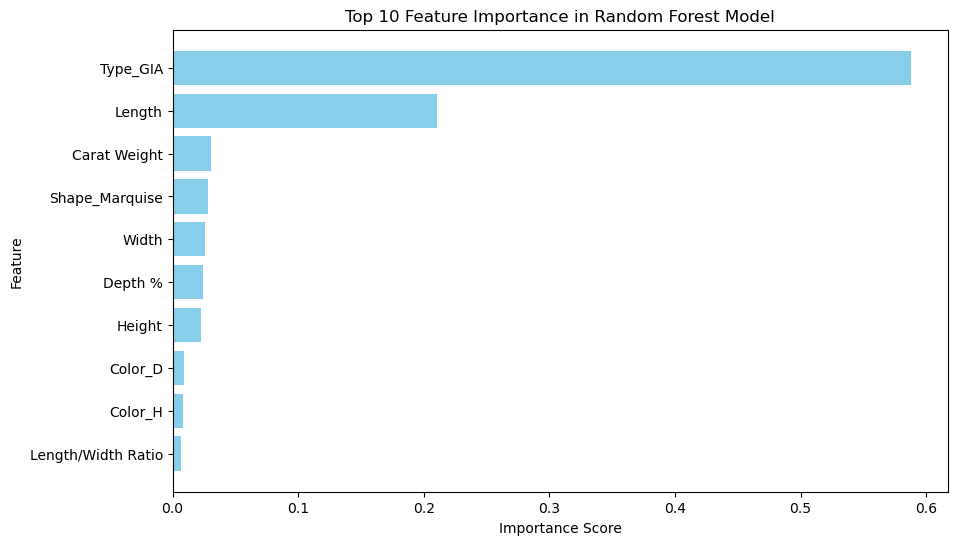

In [ ]:
# Extract feature importance
feature_importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_rand.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importance_df)

# Select the top 10 most important features
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features["Feature"], top_10_features["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Flip so the most important feature is on top
plt.show()


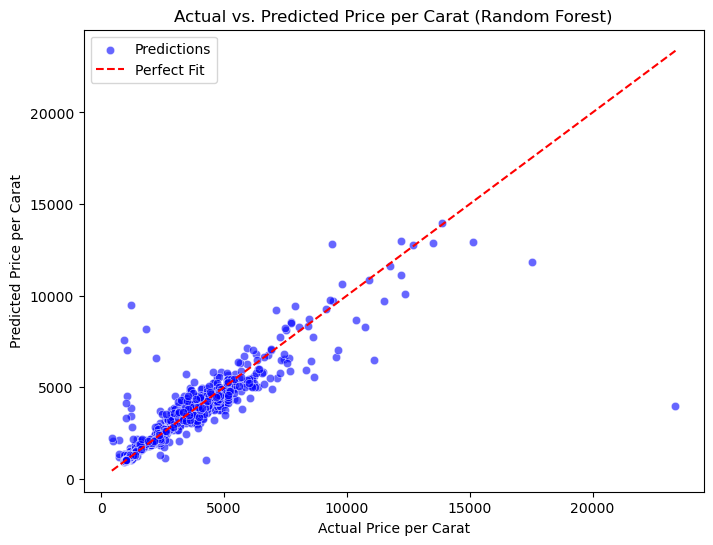

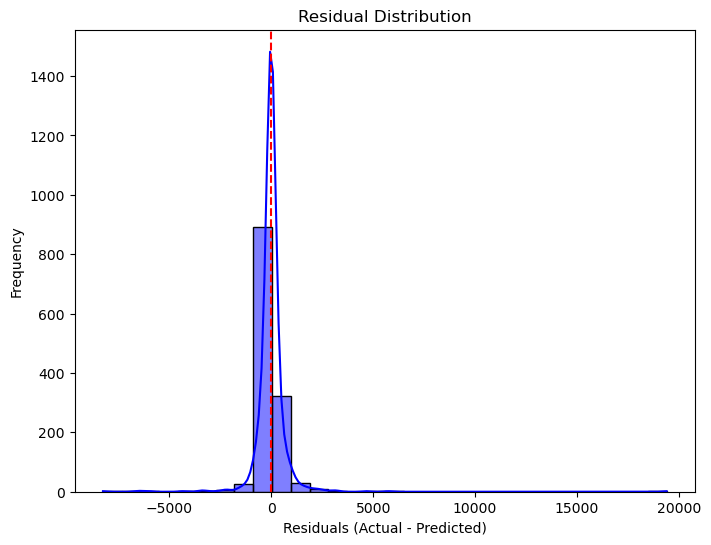

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_rand_test, y=y_rand_pred, alpha=0.6, color="blue", label="Predictions")

# Plot a perfect prediction reference line (y = x)
plt.plot([min(y_rand_test), max(y_rand_test)], [min(y_rand_test), max(y_rand_test)], 
         linestyle="--", color="red", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat (Random Forest)")
plt.legend()
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_rand_test - y_rand_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


# Random Forrest with Feature Importance Tuning

In [ ]:
importances = best_rf.feature_importances_

# Top 10 features
top_features = feature_importance_df.sort_values(by="Importance", ascending=False).head(10)["Feature"]

# Ensure feature_importance_df is created using only the top features
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': importances})

# Sort by importance and get the top 10 features
top_features = feature_importance_df.sort_values(by="Importance", ascending=False).head(10)["Feature"]

# Update the training and test sets to only include the top features
X_rand_train_top = X_rand_train[top_features]
X_rand_test_top = X_rand_test[top_features]

# Train the model with top features
best_rf.fit(X_rand_train_top, y_rand_train)

# Make predictions on the test set
y_rand_pred_top = best_rf.predict(X_rand_test_top)

# Evaluate performance
mae = mean_absolute_error(y_rand_test, y_rand_pred_top)
mse = mean_squared_error(y_rand_test, y_rand_pred_top)
rmse = np.sqrt(mse)
r2 = r2_score(y_rand_test, y_rand_pred_top)

# Print results
print("Model Performance with Top 10 Features:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Model Performance with Top 10 Features:
R² Score: 0.7954
MAE: 401.81
MSE: 904158.73
RMSE: 950.87


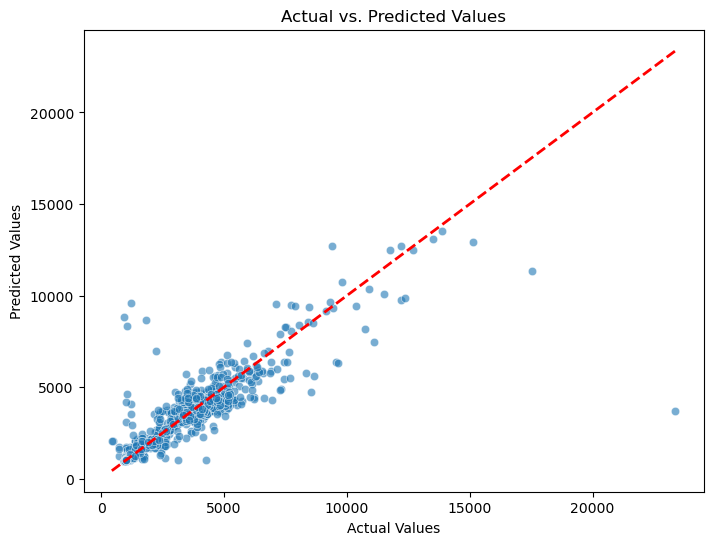

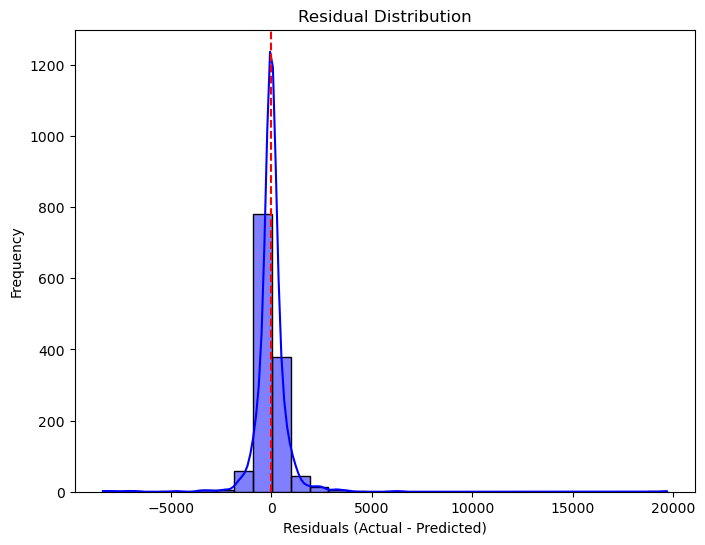

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_rand_test, y=y_rand_pred_top, alpha=0.6)

# Add a reference line (perfect predictions)
plt.plot([y_rand_test.min(), y_rand_test.max()], [y_rand_test.min(), y_rand_test.max()], 'r--', lw=2)

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_rand_test - y_rand_pred_top

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Tuned GridSearch with more Values

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' (invalid option)
    'bootstrap': [True, False]  
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_rand_train, y_rand_train)

# Best parameters
print("Beste Parameter:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions on test set
y_pred = best_model.predict(X_rand_test)

# Calculate metrics
r2 = r2_score(y_rand_test, y_pred)
mae = mean_absolute_error(y_rand_test, y_pred)
mse = mean_squared_error(y_rand_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Beste Parameter: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
R²: 0.8237
MAE: 318.1860
MSE: 778992.8777
RMSE: 882.6057


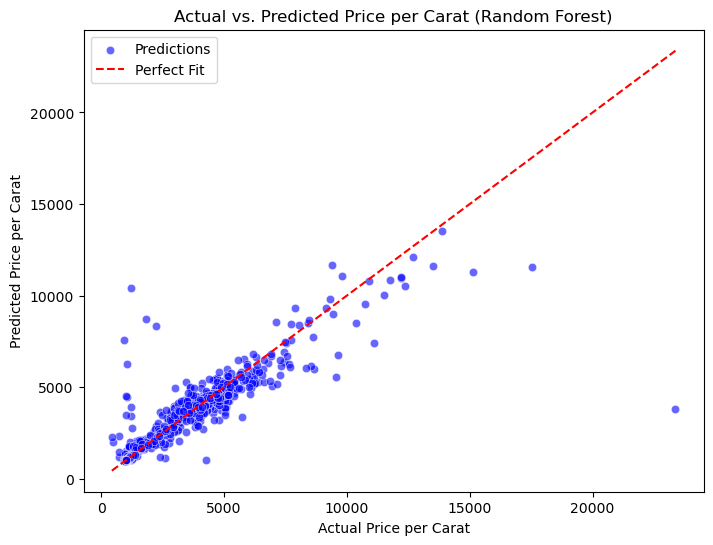

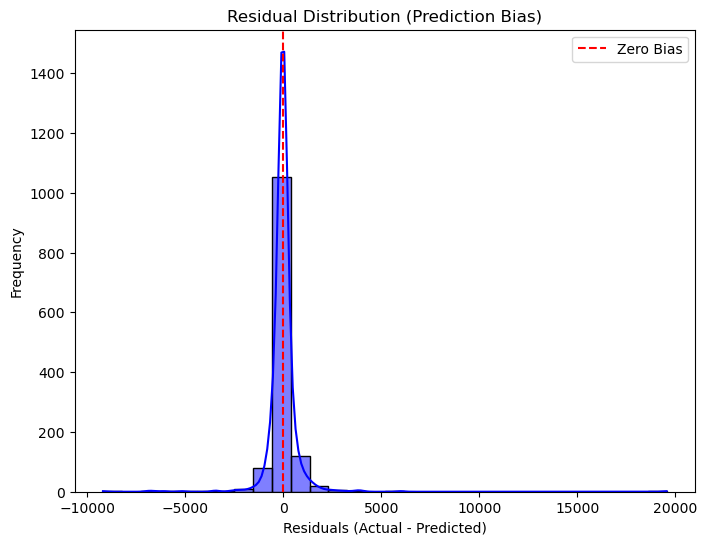

In [ ]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_rand_test, y=y_pred, alpha=0.6, color="blue", label="Predictions")

# Perfect prediction reference line (y = x)
plt.plot([min(y_rand_test), max(y_rand_test)], 
         [min(y_rand_test), max(y_rand_test)], 
         linestyle="--", color="red", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat (Random Forest)")
plt.legend()
plt.show()

# Residuals (Bias Calculation)
residuals = y_rand_test - y_pred

# Residual Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--", label="Zero Bias")

# Labels and title
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Prediction Bias)")
plt.legend()
plt.show()
